## Loan Default Risk - Exploratory Data Analysis

#### This notebook is focused on data exploration. The key objective is to familiarise myself with the data and to identify any issues. This could lead to data cleaning or feature engineering. <br> 



<u> Contents </u> 

 1. Importing Relevant Libraries, Reading In Data

 2. Anomly Detection and Correction
 
 3. Data Exploration
 
 4. Summary
 
 5. Distribution of New Datasets

#### 1.1 Importing Relevant Libraries

In [1]:
#Importing data wrangling library
import pandas as pd                                            #Data Wrangling/Cleaning package for mixed data
import numpy as np                                             #Data wrangling & manipulation for numerical data
import os

#Importing visulization libraries
from matplotlib import pyplot as plt                           #Importing visulization libraries
import seaborn as sns


#Importing Machine Learning Libraries(Preprocessing)
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder           # sklearn preprocessing for dealing with categorical variables


#Importing Machine Learning Libraries(Modelling And Evaluation) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [2]:
os.getcwd()                                            # Get working Directory

'C:\\Users\\chara.geru\\OneDrive - Avanade\\DataScienceProject\\HomeCreditModel\\notebooks'

#### 1.2 Reading In Data

In [3]:
rawfilepath = 'C:/Users/chara.geru/OneDrive - Avanade/DataScienceProject/HomeCreditModel/data/raw/'
filename = 'application_train.csv'

interimfilepath1 = 'C:/Users/chara.geru/OneDrive - Avanade/DataScienceProject/HomeCreditModel/data/interim/'
filename1 = 'df1.csv'
filename2 = 'df2.csv'
 
application_train = pd.read_csv(rawfilepath + filename)
df1 = pd.read_csv(interimfilepath1 + filename1)
df2 = pd.read_csv(interimfilepath1 + filename2)

In [4]:
print('Size of application_train data:', application_train.shape)   #Printing shape of datasets

Size of application_train data: (307511, 122)


This dataset has: 
- 122 columns (features)
- 307511 rows

In [5]:
application_train.columns.values                               #Printing all column names

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
pd.set_option('display.max_columns', None)               #Display all columns
application_train.describe()                             #Get summary statistics for all columns

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
application_train.head()                                   #View first 5 rows of the dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Generally the data looks good based on the statistics shown from the describe method. 

<u>Potentional issues </u> <br>
- Values in DAYS_BIRTH column are negative. They represent number of days a person was before they applied for a loan. For a better representation, I will convert them to positive values and convert days to years, for better representation of the data.<br>
- DAYS_EMPLOYED will be given the same treatment for the same reasons.

#### 2.1 Anomly Detection

In [8]:
(application_train['DAYS_BIRTH']).describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [9]:
(application_train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

#### 3.1 Check for Nulls

In [10]:
# "This function creates a table to summarize the null values"

def nulltable(df):
    """
    This function creates a table to summarize the null values
    """
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_df_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_df_data.head(30) 

In [11]:
nulltable(application_train)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


- There are a large number of columns(features) with more than 50% NULLS.
- I've deicided to drop these columns as they will not provide much information for training the model.
- If a feaure has less than 50% NULLS, these maybe filled up using an appropriate calcualtion such as mean, median or mode

#### 3.2 Data balanced or imbalanced

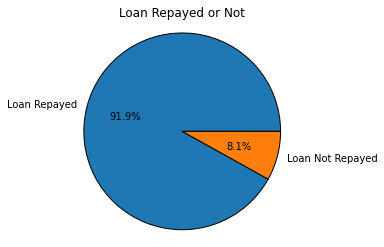

In [12]:
#Data balanced or imbalanced
temp = application_train["TARGET"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(temp, labels=['Loan Repayed','Loan Not Repayed'], autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
ax1.axis('equal')
plt.title('Loan Repayed or Not')
plt.show()

Data is higly imbalanced <br>
- This emphasises the importance of assessing the precision/recall to evaluate results. For example, predicting all rows as not defaulted would lead to an accuracy of 91.9%.
- Consider rebalancing the training data


#### 3.3 Number of each type of column

In [13]:
# Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

- There are 16 object columns.
- These will need to be encoded when building the model (using label encoder or one hot encoder)

#### 3.4 Number of unique classes in each object column

In [14]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- Gender has 3 values. This needs investigation and correction.

####  4. Summary
Based on the analysis so far we have identified the need to handle:
    
    - skewed data
    - removing rows with large number of NULLS
    - remove rows with third gender
    
This led to the development of 2 new datasets, as we can't be sure which iterations would lead to the best model performance. This is a good opportunity for trial and error where I compare the perforomance of different permutations.

Here are some visualisations to describe the new datasets

df1<br>
- Negative DAYS_BIRTH converted to positive YEARS_BIRTH
- Rows with third gender dropped
- Dealt with features with large number of NULLs

df2<br>
- df2 has all the changes implemented to df1
- In adition to that, in df2 the data for  the skewed columns ('AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE') hads been logged


### 5. Distrubutions of New Datasets

 5.1 Plotting distribution of Datasets <br>
 -I had initally plotted historgams for features like AMT_CREDIT, AMT_TOTAL_INCOME and AMT_GOOD_PRICE using df1. But I found that the distributions were skewed. So I logged these features to create df2 and plotted these features again. I show the comparions of the same below: 

Text(0.5, 0, 'Log_AMT_CREDIT')

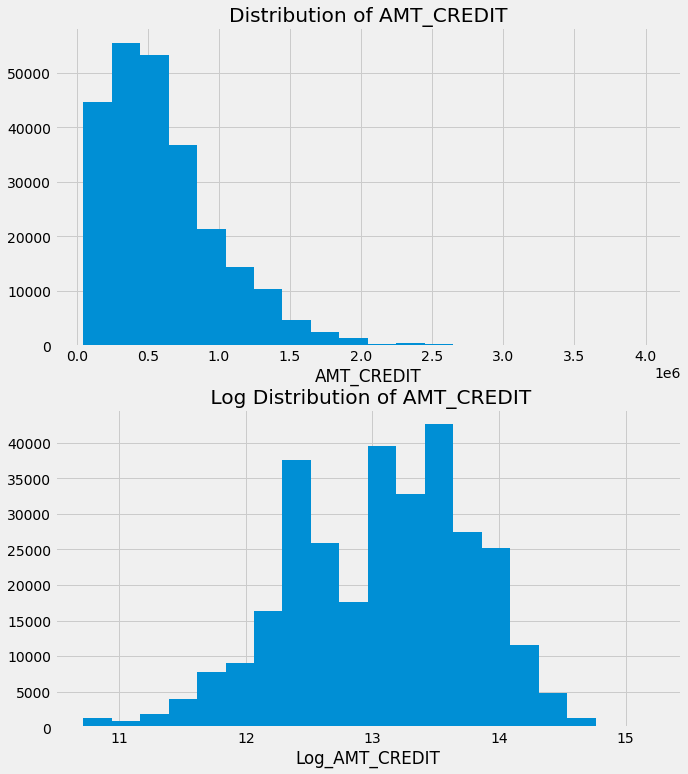

In [15]:
# Set the style of plots
plt.style.use('fivethirtyeight')

plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)


plt.title("Distribution of AMT_CREDIT")
plt.hist(df1["AMT_CREDIT"], bins =20)                         
plt.xlabel("AMT_CREDIT")


plt.subplot(2, 1, 2)


plt.title(" Log Distribution of AMT_CREDIT")

plt.hist(df2["AMT_CREDIT"], bins =20)
plt.xlabel("Log_AMT_CREDIT")

Text(0.5, 0, 'Log_INCOME_TOTAL')

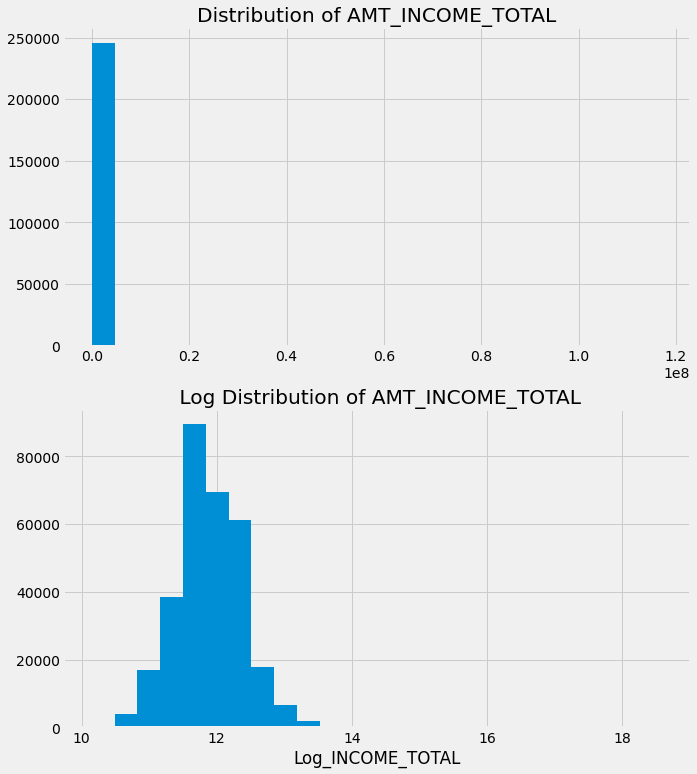

In [16]:
plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)
plt.title("Distribution of AMT_INCOME_TOTAL")
plt.hist(df1["AMT_INCOME_TOTAL"].dropna(), bins =25)


plt.subplot(2, 1, 2)
plt.title(" Log Distribution of AMT_INCOME_TOTAL")

plt.hist(df2["AMT_INCOME_TOTAL"].dropna(), bins =25)
plt.xlabel("Log_INCOME_TOTAL")

Text(0.5, 0, 'Log_GOODS_PRICE')

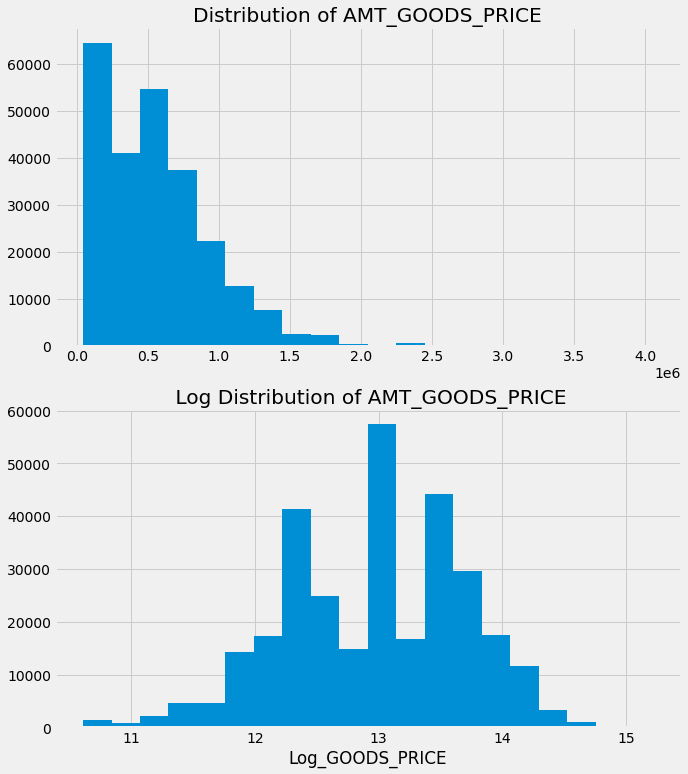

In [17]:
plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)
plt.title("Distribution of AMT_GOODS_PRICE")
plt.hist(df1["AMT_GOODS_PRICE"].dropna(), bins = 20)


plt.subplot(2, 1, 2)
plt.title(" Log Distribution of AMT_GOODS_PRICE")

plt.hist(df2["AMT_GOODS_PRICE"].dropna(), bins = 20)
plt.xlabel("Log_GOODS_PRICE")

Text(0.5, 0, 'Years of Employment')

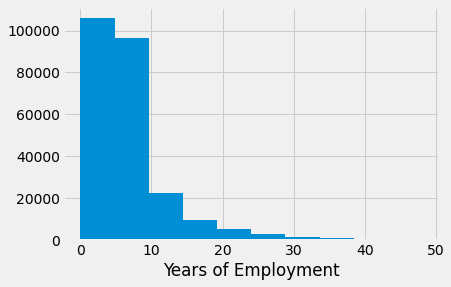

In [18]:
plt.hist(df1['YEARS_EMPLOYED'])
plt.xlabel('Years of Employment')

- It is not resonable to have such high years of employment (> 40-60 years).
- As there are amny rows, I would try and repalce the values with average years of employment
- I would plot the distribution of the reasonable values to get a clearer picture of the disrtibution.
- Based on the ditribution, I would decide to take a log of the values to reduce the skew.

In [19]:
less_years = df1[df1.YEARS_EMPLOYED <= 80]
more_years = df1[df1.YEARS_EMPLOYED >80]

Text(0.5, 0, 'Distribution of Lesser Years of Employment')

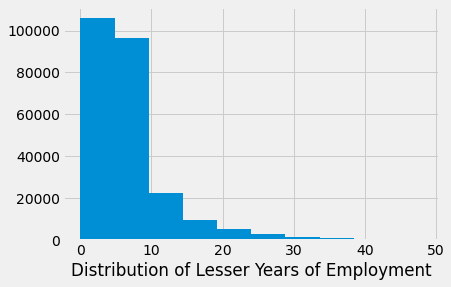

In [20]:
plt.hist(less_years['YEARS_EMPLOYED'])
plt.xlabel('Distribution of Lesser Years of Employment')

#### log this data and change it in df1

In [21]:
less_years['YEARS_EMPLOYED'].mean()

6.617718387712338

In [22]:
df1['YEARS_EMPLOYED'] = np.where(df1['YEARS_EMPLOYED'] > 80, 7, df1['YEARS_EMPLOYED'])

Text(0.5, 0, 'Years of Employment')

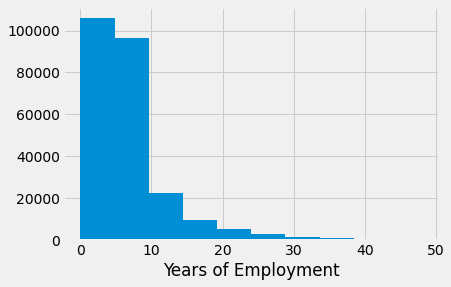

In [23]:
plt.hist(df1['YEARS_EMPLOYED'])
plt.xlabel('Years of Employment')

Text(0.5, 0, 'Years of Employment')

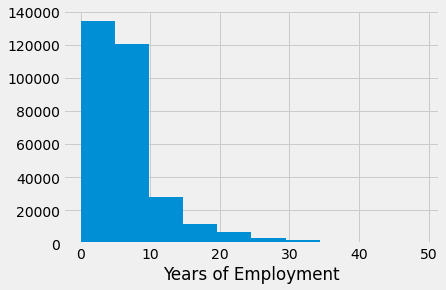

In [24]:
plt.hist(df2['YEARS_EMPLOYED'])
plt.xlabel('Years of Employment')

In [25]:
##Defaul = df1[df1['TARGET'] == 1]
Not_defaul = df1[df1['TARGET'] == 0]

In [26]:
# Find correlations with the target and sort
correlations = df1.corr()['TARGET'].sort_values()

# Display correlations
print('\nMost Positive Correlations: \n ', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations: 
  FLAG_WORK_PHONE                0.027335
LIVE_CITY_NOT_WORK_CITY        0.032575
DEF_60_CNT_SOCIAL_CIRCLE       0.032796
DEF_30_CNT_SOCIAL_CIRCLE       0.032987
OWN_CAR_AGE                    0.039432
DAYS_REGISTRATION              0.041980
REG_CITY_NOT_LIVE_CITY         0.044239
FLAG_DOCUMENT_3                0.044920
FLAG_EMP_PHONE                 0.045508
REG_CITY_NOT_WORK_CITY         0.050967
DAYS_ID_PUBLISH                0.052650
DAYS_LAST_PHONE_CHANGE         0.054597
REGION_RATING_CLIENT           0.059188
REGION_RATING_CLIENT_W_CITY    0.061188
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178404
EXT_SOURCE_2                 -0.161311
EXT_SOURCE_1                 -0.154455
YEARS_BIRTH                  -0.078049
YEARS_EMPLOYED               -0.071547
FLOORSMAX_AVG                -0.045667
FLOORSMAX_MEDI               -0.045520
FLOORSMAX_MODE               -0.0445

In [27]:
# Find the correlation of the positive days since birth and target
df1['YEARS_BIRTH'] = abs(df1['YEARS_BIRTH'])
df1['YEARS_BIRTH'].corr(df1['TARGET'])

-0.07804907460275402

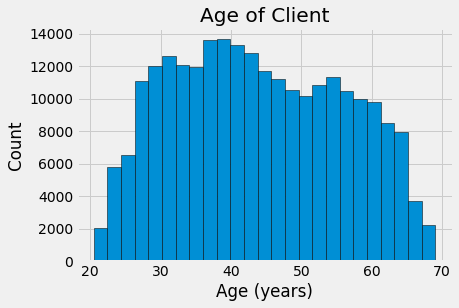

In [28]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df1['YEARS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

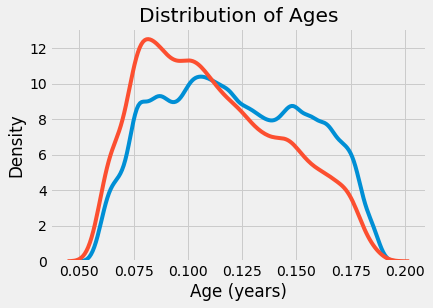

In [29]:
# KDE plot of loans that were repaid on time
sns.kdeplot(df1.loc[df1['TARGET'] == 0, 'YEARS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df1.loc[df1['TARGET'] == 1, 'YEARS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [30]:
age_data = df1[['TARGET', 'YEARS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

<ipython-input-30-f08e4b57f1df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
<ipython-input-30-f08e4b57f1df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,YEARS_BIRTH,YEARS_BINNED
0,1,25.920548,"(25.0, 30.0]"
1,0,45.931507,"(45.0, 50.0]"
2,0,52.180822,"(50.0, 55.0]"
3,0,52.068493,"(50.0, 55.0]"
4,0,54.608219,"(50.0, 55.0]"
5,0,46.413699,"(45.0, 50.0]"
6,0,37.747945,"(35.0, 40.0]"
7,0,51.643836,"(50.0, 55.0]"
8,0,55.065753,"(55.0, 60.0]"
9,0,39.641096,"(35.0, 40.0]"


In [31]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,YEARS_BIRTH
YEARS_BINNED,,
"(20.0, 25.0]",0.125497,23.376236
"(25.0, 30.0]",0.111398,27.813647
"(30.0, 35.0]",0.103085,32.471847
"(35.0, 40.0]",0.089010,37.552659
"(40.0, 45.0]",0.078467,42.452085
"(45.0, 50.0]",0.074531,47.461080
"(50.0, 55.0]",0.068144,52.587981
"(55.0, 60.0]",0.056028,57.487929
"(60.0, 65.0]",0.052851,62.417965


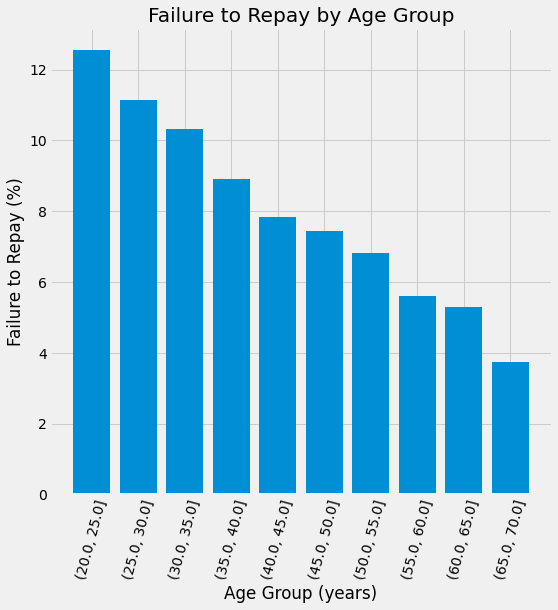

In [32]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [33]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df1[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH
TARGET,1.000000,-0.154455,-0.161311,-0.178404,-0.078049
EXT_SOURCE_1,-0.154455,1.000000,0.217296,0.186352,0.600584
EXT_SOURCE_2,-0.161311,0.217296,1.000000,0.109942,0.094101
EXT_SOURCE_3,-0.178404,0.186352,0.109942,1.000000,0.207427
YEARS_BIRTH,-0.078049,0.600584,0.094101,0.207427,1.000000


In [34]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


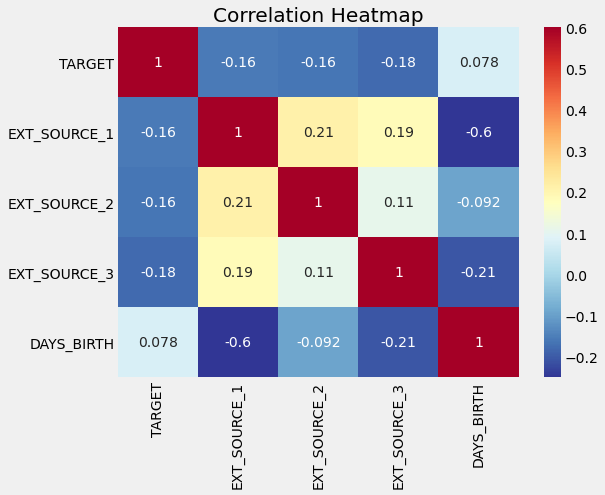

In [35]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

#DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

#so try build model with EXT_SOURCE_1 and/or DAYS_BIRTH

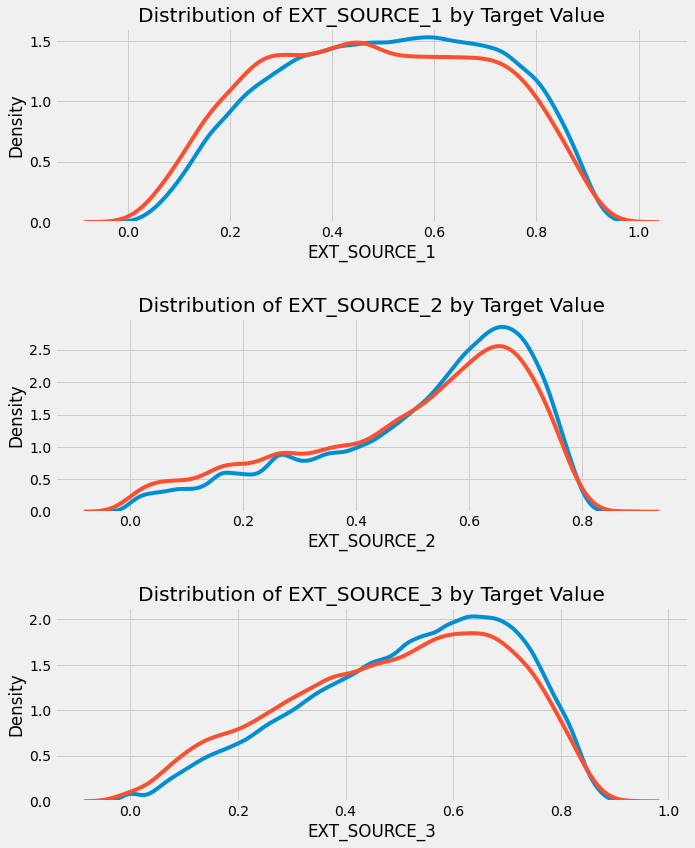

In [36]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    #
    plt.subplot(3, 1, i+1)
    # plot repaid loans
    sns.kdeplot(df1.loc[df1['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df1.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [ ]:
# Make a new dataframe for polynomial features
poly_features = df1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BIRTH', 'TARGET']]
poly_features_test = df1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)